## LAB - S08-L004 - pie plot

1. Zaimportuj moduł pandas, numpy i matplotlib i nadaj im standardowe aliasy. Dodaj instrukcję powodującą wyświetlenie wykresu generowanego przez matplotlib w jupyter notebook.

2. Uruchom poniższy fragment kodu, aby przygotować dane do rysowania wykresu (wszystkie zastosowane polecenia powinny Ci już być na tym etapie znane):

#### import datetime
#### #Import data
#### nasa = pd.read_csv("nasa_facebook_statuses.csv", usecols=["status_published","num_reactions", "num_comments","num_shares","num_likes"])
#### #Convert column type to date time
#### nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#### #Select observations between two datetimes - May 2015
#### filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
#### nasa = nasa[filter]
#### #Add column with day only
#### nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)
#### #Group all columns by sum
#### nasa_by_month = nasa.groupby(by='month').sum()
#### nasa_by_month.head()

3. Wyświetl wykres kołowy prezentujący serię num_likes znajdującą się w nasa_by_month
4. Dodaj do poprzedniego polecenia parametr zmieniający rozmiar wykresu na 5 x 5
5. Zmień polecenie dodając tytuł na NASA Facebook activity oraz zmieniający etykiety zawierające numer miesiąca na jego nazwę
6. Zmień polecenie tak, aby wygenerowane zostały 4 wykresy prezentujące wszystkie serie numeryczne z nasa_by_month
7. Zmień rozmiar na 10 x 10, ułożenie na "2 wykresiki u góry i 2 na dole", usuń legendę
8. W poprzednim wykresie ponownie włącz legendę, dodaj etykietę z informacja o udziale procentowym wycinka w całości, zmień kolor czcionki tej etykiety na biały

In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [28]:
import datetime
 #Import data
nasa = pd.read_csv("../zasoby/nasa_facebook_statuses.csv", usecols=["status_published","num_reactions", "num_comments","num_shares","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
 #Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
 #Add column with day only
nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)
nasa_by_month = nasa.groupby(by='month').sum(numeric_only=True)

<Axes: ylabel='num_comments'>

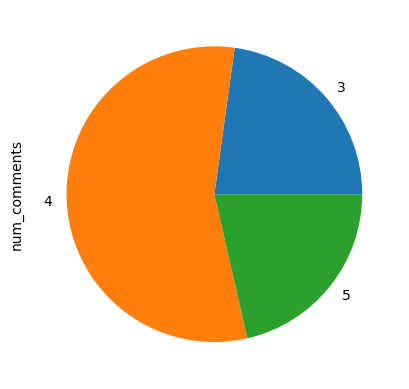

In [30]:
nasa_by_month["num_comments"].plot(kind="pie")

<Axes: ylabel='num_comments'>

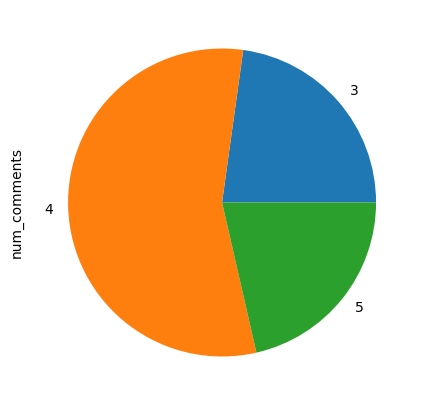

In [32]:
nasa_by_month["num_comments"].plot(kind="pie", figsize=(5,5))

<Axes: title={'center': 'NASA Facebook activity'}, ylabel='num_comments'>

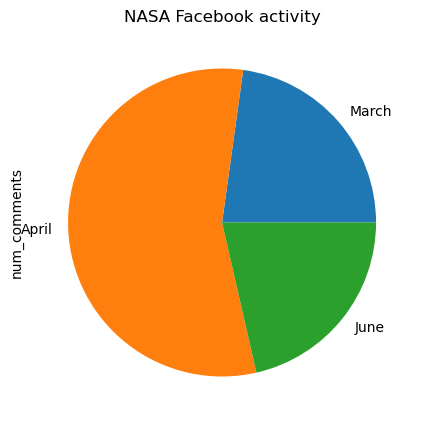

In [36]:
nasa_by_month["num_comments"].plot(kind="pie", figsize=(5,5), title='NASA Facebook activity', labels=("March","April","June"))

array([[<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>],
       [<Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>]],
      dtype=object)

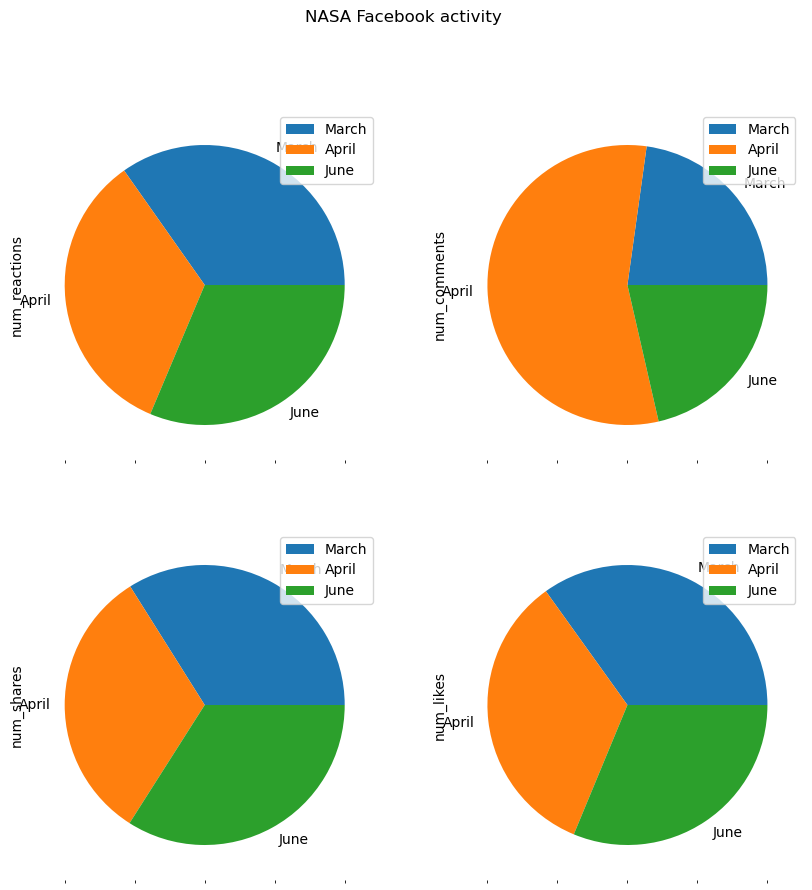

In [44]:
nasa_by_month.plot(kind="pie", figsize=(10,10), layout=(2,2), title='NASA Facebook activity', labels=("March","April","June"),subplots=True)

array([[<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>],
       [<Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>]],
      dtype=object)

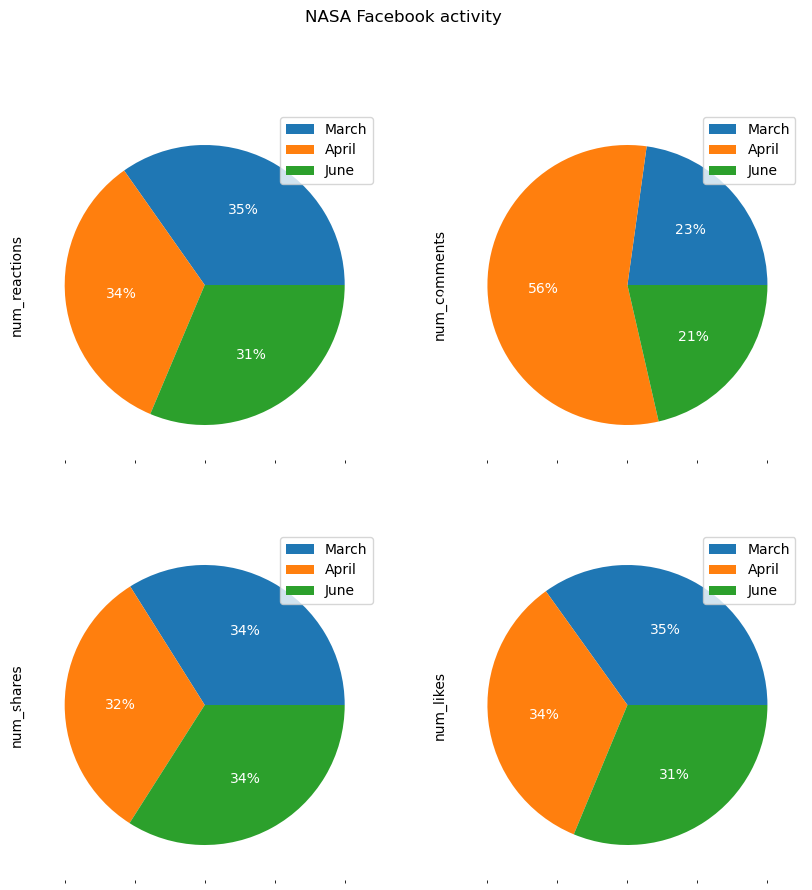

In [46]:
nasa_by_month.plot(kind="pie", 
                   figsize=(10,10), 
                   layout=(2,2), 
                   title='NASA Facebook activity', 
                   labels=("March","April","June"), 
                   subplots=True, autopct="%.0f%%", 
                   textprops=dict(color='white'))